<a href="https://colab.research.google.com/github/hmyrcmn/FaceMaskDetectionYolo/blob/h%C4%B1jyen/maskFacebokHUmandet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install icrawler
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    storage={
        "backend": "FileSystem",
        "root_dir": "/content/x",
    }
)
google_crawler.crawl(keyword="full-length photographs of real people wearing real masks in crowded places . maybe pictures from the covid era", max_num=100)

ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1249787458/photo/crowd-of-busy-commuters-with-protective-face-mask-walking-through-platforms-at-subway-station.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1203376093/photo/asian-woman-with-protective-face-mask-holding-smartphone-standing-in-the-middle-of-busy.jpg
ERROR:downloader:Response status code 404, file https://t3.ftcdn.net/jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1305822725/photo/crowd-of-people-crossing-street-paris-france.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1128162568/photo/group-of-many-salary-man-wearing-face-mask-for-protect-micro-dust-in-air-while-going-to-their.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1269558694/photo/new-york-new-york-a-person-wearing-a-mask-stands-amongst-a-crowd-of-people-waiting-in-line-at.jpg
ER

In [20]:
# Gerekli paketi yükle
!pip install icrawler

# Gerekli modülü içe aktar
from icrawler.builtin import GoogleImageCrawler

# Google görsellerinden uygun fotoğrafları indir
google_crawler = GoogleImageCrawler(
    storage={
        "backend": "FileSystem",
        "root_dir": "/content/dataRes_HygienicChefs"
    }
)

# Anahtar kelimeler hijyen kurallarına daha uygun hale getirildi
search_keywords = [
    "professional chefs wearing face masks and gloves in a clean restaurant kitchen",
    "chefs with white uniforms, hats, masks, and aprons working hygienically",
    "hygienic kitchen staff wearing protective gear in restaurant",
    "restaurant kitchen hygiene: chefs in masks, gloves, hats",
    "food safety in professional kitchen with masked chefs"
]

# Her anahtar kelime için görsel indir (örnek olarak her biri için 60 görsel)
for keyword in search_keywords:
    google_crawler.crawl(keyword=keyword, max_num=300)


ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1300835761/photo/confident-cook-wearing-protective-face-mask-and-gloves.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1273354292/photo/chef-working-at-a-restaurant-wearing-a-facemask.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1273923095/photo/chef-wearing-a-facemask-at-a-restaurant-while-presenting-a-plate-during-the-pandemic.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1265081972/photo/cook-wearing-facemask-in-a-commercial-kitchen-while-presenting-a-plate.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1368915619/photo/chef-and-cook-cleaning-the-workspace-after-doing-dishes-indoors-in-restaurant-kitchen.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1273354313/photo/happy-chef-working-at-a-restaurant-wearing-a-fa


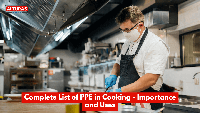
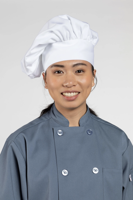
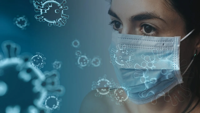
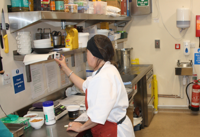
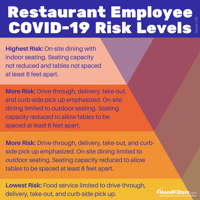
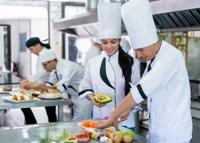
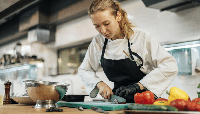
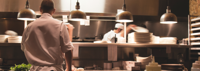
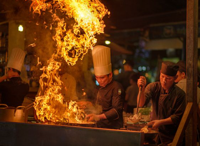
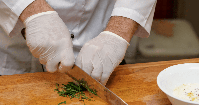
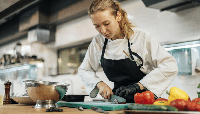
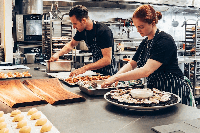
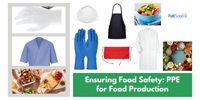
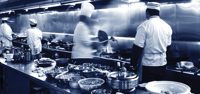
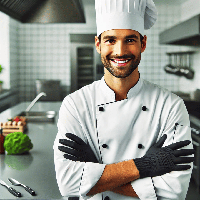
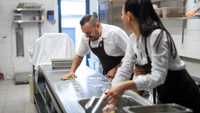
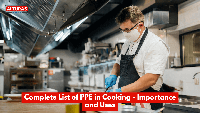
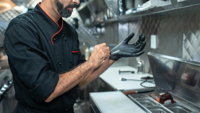
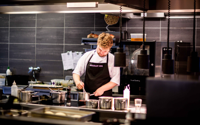
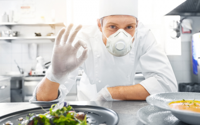
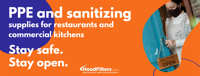
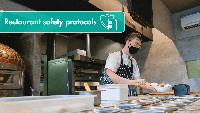
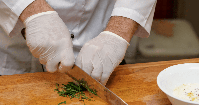
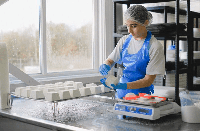
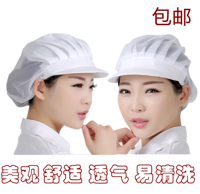
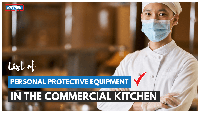
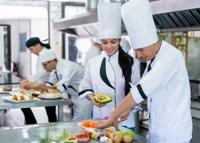
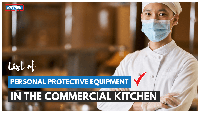
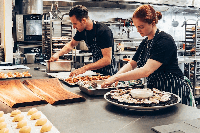
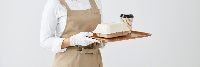
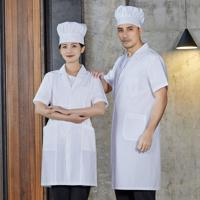
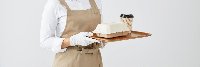
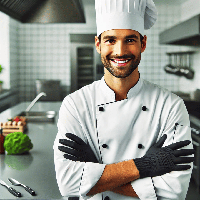
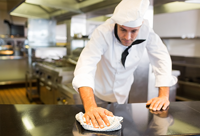
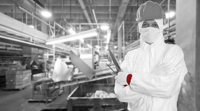
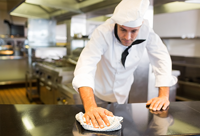
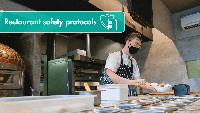
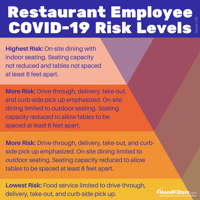
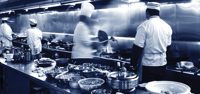
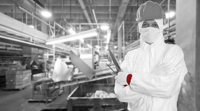
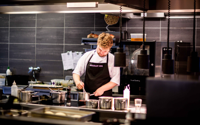
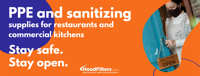
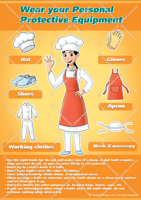
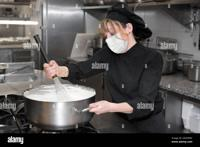
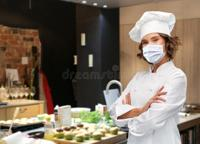
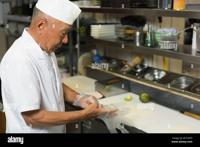
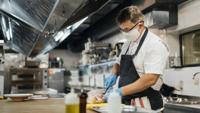
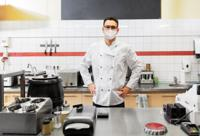
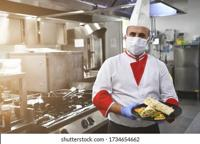
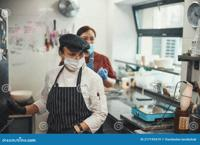
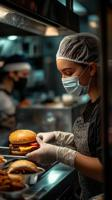
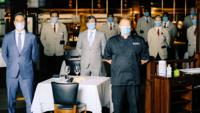
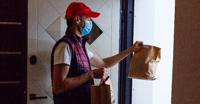
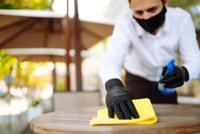
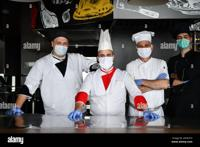
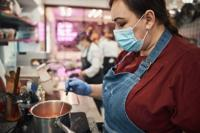
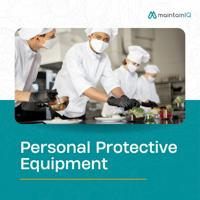
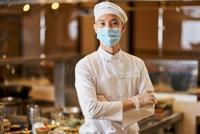
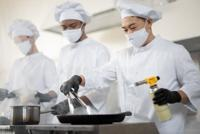
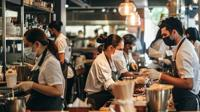
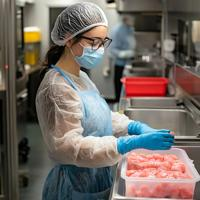
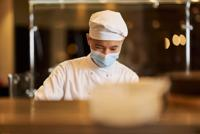
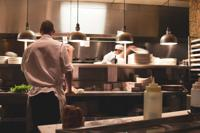
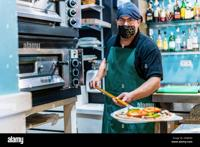
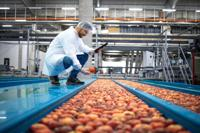
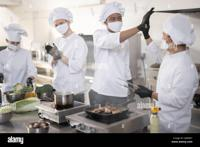
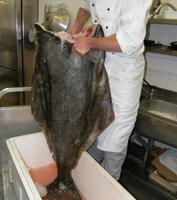
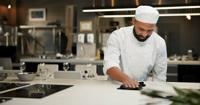
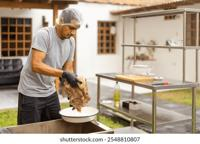
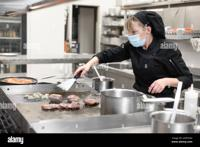
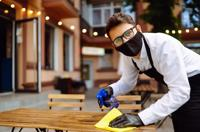
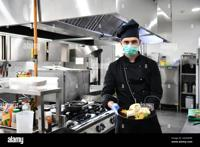
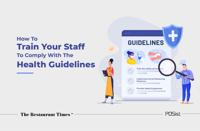
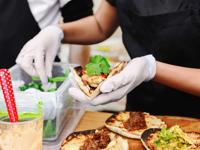
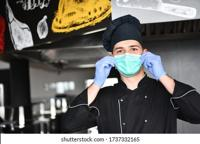
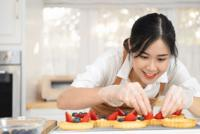
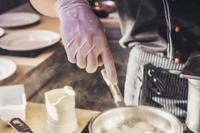
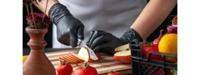
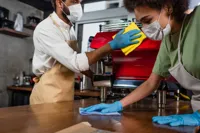
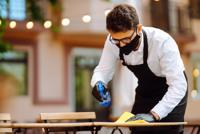
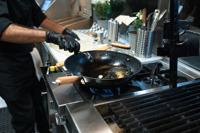
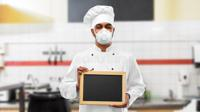
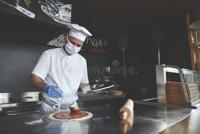
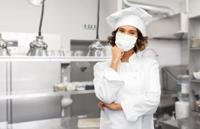
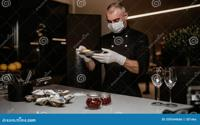
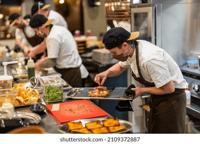
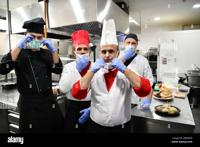
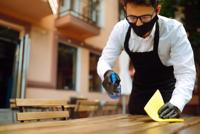
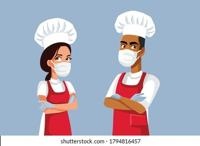
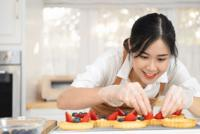
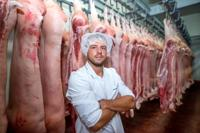
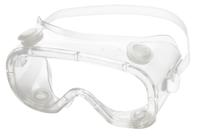
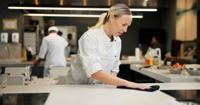
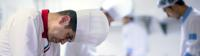
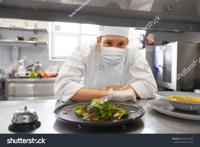
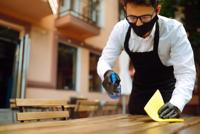
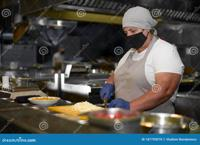
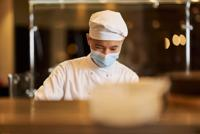
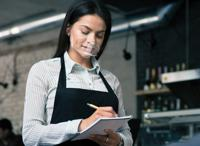
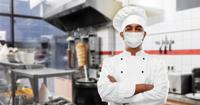
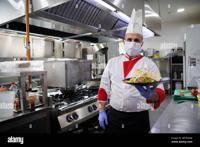
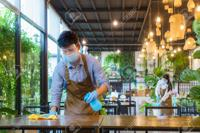
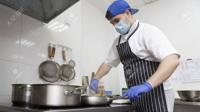
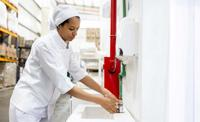
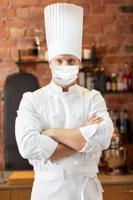
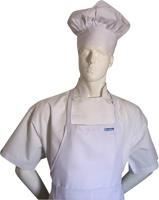
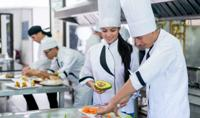
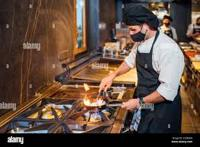
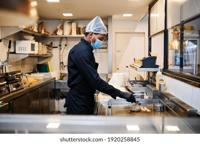
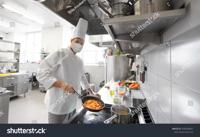
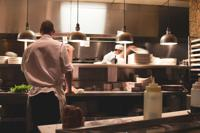
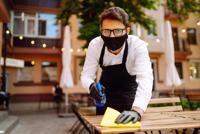
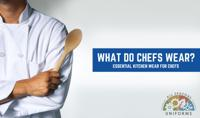
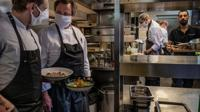
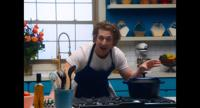
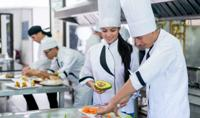
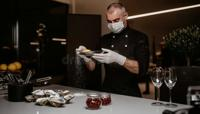
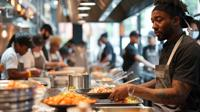
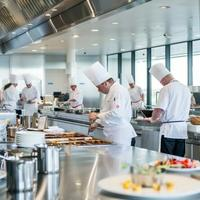
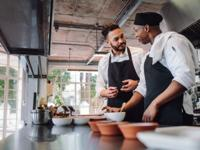
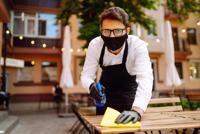
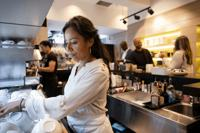
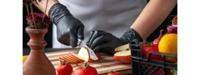
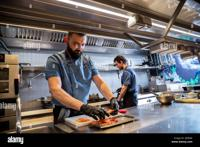
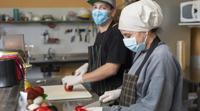
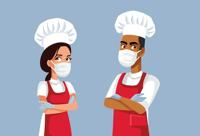
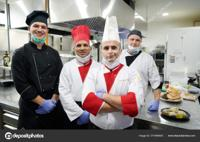
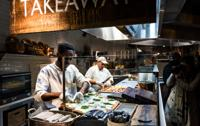
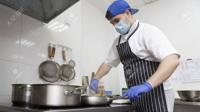
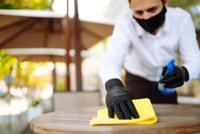
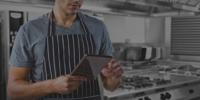
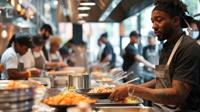
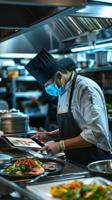
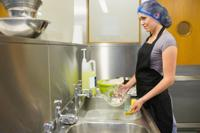
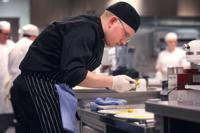

In [21]:
# Gerekli kütüphaneleri içe aktar
from google.colab import files
from PIL import Image
import io
import base64
import zipfile
import os
import glob
from IPython.display import display, HTML

image_files = []
extensions = ('*.png', '*.jpg', '*.jpeg', '*.gif', '*.bmp')
for ext in extensions:
    image_files.extend(glob.glob(os.path.join("/content/dataRes_HygienicChefs", '**', ext), recursive=True))

# Resimleri işleyip HTML ile göster
images_html = []
for img_path in image_files:
    try:
        img = Image.open(img_path)
        img.thumbnail((200, 200))  # Maksimum 100x100 piksel

        # Resmi bellek üzerinde işle
        buffer = io.BytesIO()
        img.save(buffer, format=img.format)
        data_uri = base64.b64encode(buffer.getvalue()).decode('utf-8')

        # HTML img etiketi oluştur
        images_html.append(f'<img src="data:image/{img.format.lower()};base64,{data_uri}" title="{os.path.basename(img_path)}" style="margin:5px;">')
    except Exception as e:
        print(f"{img_path} işlenirken hata oluştu: {e}")

# Tüm resimleri yatay olarak göster
display(HTML('<div style="display:flex;flex-wrap:wrap;">' + ''.join(images_html) + '</div>'))

In [22]:
!pip install transformers torchvision pillow
!pip install icrawler
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


In [23]:

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# human det :

In [24]:
# Giriş ve çıkış klasörleri
input_folder = "/content/dataRes_HygienicChefs"
output_folder = "/content/dataRes_HygienicChefs-detHuman"
os.makedirs(output_folder, exist_ok=True)

# Resim dosyalarını al
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Her resim için işle
for img_name in image_files:
    image_path = os.path.join(input_folder, img_name)
    image = Image.open(image_path).convert("RGB")

    # Model tahmini
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Her nesneyi kontrol et
    for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
        label_name = model.config.id2label[label.item()]

        if label_name.lower() == "person":  # sadece insan
            box = [int(i) for i in box.tolist()]
            x_min, y_min, x_max, y_max = box

            # Görüntü boyutları dışına taşmasın
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(image.width, x_max)
            y_max = min(image.height, y_max)

            cropped = image.crop((x_min, y_min, x_max, y_max))

            # Kaydet
            output_name = f"{os.path.splitext(img_name)[0]}_person{i+1}.jpg"
            cropped.save(os.path.join(output_folder, output_name))

print("✅ Sadece 'person' (insan) nesneleri kırpıldı ve 'person_crops/' klasörüne kaydedildi.")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


✅ Sadece 'person' (insan) nesneleri kırpıldı ve 'person_crops/' klasörüne kaydedildi.


#test

In [25]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00


In [26]:
from ultralytics import YOLO
import os

# Modeli yükle (örneğin: 'best.pt')
model_path = "/content/drive/MyDrive/HıjyenDatayolo/train/weights/best.pt"  # kendi model ağırlığını buraya koy
model = YOLO(model_path)

# Girdi klasörü (yüz kırpılmış resimler)
input_dir = "/content/dataRes_HygienicChefs-detHuman"
output_dir = "/content/dataRes_HygienicChefs-detHuman/yoloOutHuman"
os.makedirs(output_dir, exist_ok=True)

# Tüm yüz kırpıntılarına inference yap
results = model.predict(
    source=input_dir,        # klasördeki resimler
    conf=0.25,               # güven eşiği
    save=True,               # tahminleri kaydet
    save_txt=True,           # .txt formatında bbox bilgileri
    project=output_dir,      # çıktı klasörü
    name="predictions",      # alt klasör adı
    exist_ok=True            # üzerine yazabilsin
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/237 /content/dataRes_HygienicChefs-detHuman/000001_person1.jpg: 640x320 (no detections), 105.0ms
image 2/237 /content/dataRes_HygienicChefs-detHuman/000001_person2.jpg: 640x416 (no detections), 58.5ms
image 3/237 /content/dataRes_HygienicChefs-detHuman/000001_person3.jpg: 640x448 (no detections), 53.4ms
image 4/237 /content/dataRes_HygienicChefs-detHuman/000002_person6.jpg: 640x352 1 bone, 1 mask, 52.2ms
image 5/237 /content/dataRes_HygienicChefs-detHuman/000003_person1.jpg: 640x608 1 bone, 1 mask, 59.9ms
image 6/237 /content/dataRes_HygienicChefs-detHuman/000003_person14.jpg: 640x384 2 masks, 1 nobone, 56.1ms
image 7/237 /content/dataRes_HygienicChefs-detHuman/000004_per

In [27]:
from ultralytics import YOLO
import os

# Modeli yükle (örneğin: 'best.pt')
model_path = "/content/drive/MyDrive/HıjyenDatayolo/train/weights/best.pt"  # kendi model ağırlığını buraya koy
model = YOLO(model_path)

# Girdi klasörü (yüz kırpılmış resimler)
input_dir = "/content/dataRes_HygienicChefs"
output_dir = "/content/dataRes_HygienicChefs-det"
os.makedirs(output_dir, exist_ok=True)

# Tüm yüz kırpıntılarına inference yap
results = model.predict(
    source=input_dir,        # klasördeki resimler
    conf=0.25,               # güven eşiği
    save=True,               # tahminleri kaydet
    save_txt=True,           # .txt formatında bbox bilgileri
    project=output_dir,      # çıktı klasörü
    name="predictions",      # alt klasör adı
    exist_ok=True            # üzerine yazabilsin
)



image 1/135 /content/dataRes_HygienicChefs/000001.jpg: 480x640 (no detections), 6.9ms
image 2/135 /content/dataRes_HygienicChefs/000001.png: 416x640 1 bone, 1 mask, 18.1ms
image 3/135 /content/dataRes_HygienicChefs/000002.jpg: 480x640 1 bone, 1 mask, 20.2ms
image 4/135 /content/dataRes_HygienicChefs/000003.jpg: 480x640 2 masks, 1 nobone, 14.1ms
image 5/135 /content/dataRes_HygienicChefs/000003.png: 384x640 1 bone, 1 mask, 20.5ms
image 6/135 /content/dataRes_HygienicChefs/000004.jpg: 640x448 1 bone, 1 mask, 13.5ms
image 7/135 /content/dataRes_HygienicChefs/000004.png: 640x480 1 bone, 1 nomask, 12.9ms
image 8/135 /content/dataRes_HygienicChefs/000005.jpg: 448x640 1 mask, 1 nobone, 105.0ms
image 9/135 /content/dataRes_HygienicChefs/000006.jpg: 448x640 3 bones, 4 masks, 20.9ms
image 10/135 /content/dataRes_HygienicChefs/000007.jpg: 480x640 3 bones, 1 nomask, 2 masks, 1 nobone, 15.2ms
image 11/135 /content/dataRes_HygienicChefs/000008.jpg: 480x640 1 bone, 2 masks, 28.0ms
image 12/135 /cont

In [ ]:
# Verilen dizin yolları
input_folder = "/content/dataRes_HygienicChefs-detHuman/yoloOutHuman/predictions/labels"
output_folder = "/content/dataRes_HygienicChefs-detHuman/yoloOutHuman/predictions/labels2"

# Çıktı klasörü oluşturuluyor
import os
os.makedirs(output_folder, exist_ok=True)

# Tüm tahmin dosyalarını bul
from glob import glob
prediction_files = glob(os.path.join(input_folder, "*.txt"))

# Eğer dosya yoksa hata mesajı ver
if not prediction_files:
    print(f"Dosya bulunamadı: {input_folder}")
else:
    print(f"{len(prediction_files)} dosya bulundu: {prediction_files}")

# Dosyaları görüntü ismine göre grupla
merged_predictions = {}
for pred_file in prediction_files:
    filename = os.path.basename(pred_file)
    # Örn: image_103_jpg.rf.xxxxxx_person1.txt -> image_103_jpg.rf.xxxxxx
    base_name = filename.split("_person")[0]  # 'person' kısmını kaldır
    if base_name not in merged_predictions:
        merged_predictions[base_name] = []
    with open(pred_file, "r") as f:
        merged_predictions[base_name].extend(f.readlines())

# Her grup için tek bir dosyada birleştir ve person'ı dosya isminden kaldır
for base_name, lines in merged_predictions.items():
    output_path = os.path.join(output_folder, f"{base_name}.txt")

    # Dosya yazma işlemi
    with open(output_path, "w") as f:
        f.writelines(lines)

    # Dosya yazıldıktan sonra kontrol mesajı
    print(f"Dosya kaydedildi: {output_path}")

# Başarıyla kaydedilen yeni klasörü göster
output_folder

In [38]:
import os
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Ground truth ve prediction dizinleri
gt_dir = "//content/dataRes_HygienicChefs-det/predictions/labels"
pred_dir = "/content/dataRes_HygienicChefs-detHuman/yoloOutHuman/predictions/labels2"

# Ortak dosya adlarını al (uzantısız)
gt_files = set(os.path.splitext(f)[0] for f in os.listdir(gt_dir) if f.endswith(".txt"))
pred_files = set(os.path.splitext(f)[0] for f in os.listdir(pred_dir) if f.endswith(".txt"))

y_true = []
y_pred = []

for file_name in gt_files:
    gt_path = os.path.join(gt_dir, file_name + ".txt")
    pred_path = os.path.join(pred_dir, file_name + ".txt")

    # Ground truth etiketini oku
    with open(gt_path, "r") as f:
        gt_lines = f.readlines()

    # Eğer ground truth dosyası boşsa ve prediction dosyası da yoksa -> es geç
    if not gt_lines and file_name not in pred_files:
        print(f"{file_name} etiketsiz ve tahmin yapılmamış, es geçiliyor.")
        continue

    # Ground truth sınıfları
    gt_labels = [int(line.split()[0]) for line in gt_lines if line.strip()]

    # Prediction yoksa -> 0 tahmini yapılmış gibi davran
    if file_name not in pred_files:
        print(f"{file_name} dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.")
        y_pred.extend([0] * len(gt_labels))
        y_true.extend(gt_labels)
        continue

    # Prediction varsa
    with open(pred_path, "r") as f:
        pred_lines = f.readlines()

    pred_labels = [int(line.split()[0]) for line in pred_lines if line.strip()]

    # Uzunluk eşit değilse, küçük olan kadar karşılaştır (minimum sayıda eşle)
    min_len = min(len(gt_labels), len(pred_labels))
    y_true.extend(gt_labels[:min_len])
    y_pred.extend(pred_labels[:min_len])

# Metrikleri yazdır
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["bone", "nomask", "mask", "nobone"]))


000073 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
000023 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
000085 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
000001 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.

Confusion Matrix:
[[37 10 21  8]
 [15 36  3 11]
 [21  9 38  8]
 [ 6 11 10 21]]

Classification Report:
              precision    recall  f1-score   support

        bone       0.47      0.49      0.48        76
      nomask       0.55      0.55      0.55        65
        mask       0.53      0.50      0.51        76
      nobone       0.44      0.44      0.44        48

    accuracy                           0.50       265
   macro avg       0.49      0.49      0.49       265
weighted avg       0.50      0.50      0.50       265



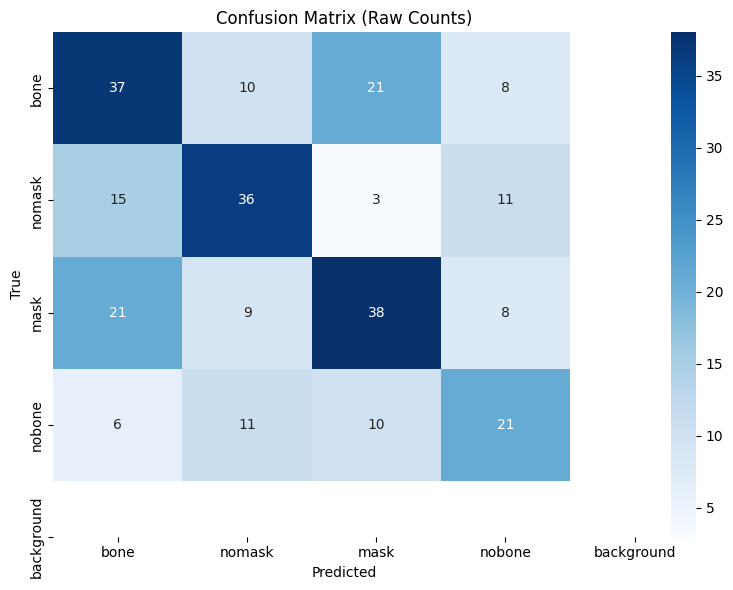

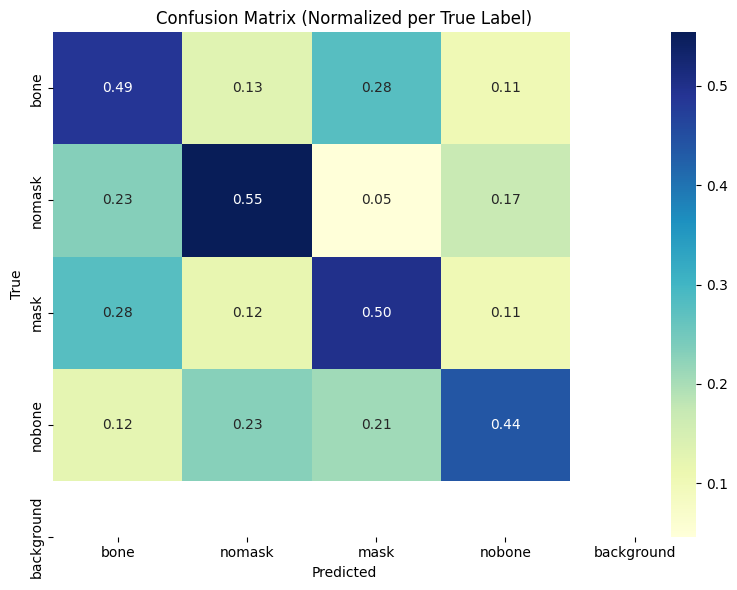

ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 🔧 Confusion matrix ve etiketler
cm = confusion_matrix(y_true, y_pred)
labels = ['bone', 'nomask', 'mask', 'nobone', 'background']

# 🔷 1. Confusion Matrix - Raw Counts
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 🔷 2. Confusion Matrix - Normalized (per row)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized)  # sıfıra bölünme hatasını engelle

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Normalized per True Label)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 🔷 3. Precision, Recall, F1-score Bar Chart
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = [cls for cls in report if cls in labels]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [report[cls][metric] for cls in classes]
    plt.bar(np.arange(len(classes)) + i * 0.25, values, width=0.25, label=metric)

plt.xticks(np.arange(len(classes)) + 0.25, classes)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Precision, Recall, F1-Score per Class")
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
from IPython.display import HTML

# Klasör yolları
img_dir_m1 = '/content/dataRes_HygienicChefs-detHuman/yoloOutHuman/predictions'
label_dir_m1 = '/content/dataRes_HygienicChefs-detHuman/yoloOutHuman/predictions/labels2'

img_dir_m2 = '/content/dataRes_HygienicChefs-det/predictions'
label_dir_m2 = '/content/dataRes_HygienicChefs-det/predictions/labels'

# Yardımcı fonksiyon: Etiketleri oku
def read_labels(label_path):
    if not os.path.exists(label_path):
        return []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        return [line.strip().split()[0] for line in lines]  # sadece class id'si

# Ortak dosyaları bul
label_files_m1 = {f.replace('.txt', '') for f in os.listdir(label_dir_m1) if f.endswith('.txt')}
label_files_m2 = {f.replace('.txt', '') for f in os.listdir(label_dir_m2) if f.endswith('.txt')}
common_files = sorted(label_files_m1.intersection(label_files_m2))

# HTML tablo satırlarını oluştur
html_rows = ['<table><tr><th>Görsel</th><th>Model 1 Etiketleri</th><th>Model 2 Etiketleri</th><th>Eşleşme</th></tr>']

for img_id in common_files:
    # Görsel yolu
    img_path = os.path.join(img_dir_m1, img_id + '.jpg')
    if not os.path.exists(img_path):
        img_path = os.path.join(img_dir_m1, img_id + '.png')  # yedek

    # Resmi oku ve küçült
    try:
        img = Image.open(img_path).convert('RGB').resize((100, 100))
        buf = io.BytesIO()
        img.save(buf, format='PNG')
        img_base64 = f"data:image/png;base64,{buf.getvalue().hex()}"
    except:
        img_base64 = ''
        continue

    # Etiketleri al
    labels1 = read_labels(os.path.join(label_dir_m1, img_id + '.txt'))
    labels2 = read_labels(os.path.join(label_dir_m2, img_id + '.txt'))

    labels1_str = ', '.join(labels1) if labels1 else '(yok)'
    labels2_str = ', '.join(labels2) if labels2 else '(yok)'

    match = '✅' if sorted(labels1) == sorted(labels2) else '❌'

    row = f"""
    <tr>
        <td><img src="{img_base64}" width="100" height="100"></td>
        <td>{labels1_str}</td>
        <td>{labels2_str}</td>
        <td style="font-size:20px;">{match}</td>
    </tr>
    """
    html_rows.append(row)

html_rows.append('</table>')

# HTML olarak göster
display(HTML(''.join(html_rows)))


Görsel,Model 1 Etiketleri,Model 2 Etiketleri,Eşleşme
